<a href="https://colab.research.google.com/github/Peter-Apps/coding-camp/blob/main/in_dev/muon_tracks_with_ML-worked_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning using Muon Tracks in CMS  


Expand the pseudocode below into an investigation of [muon track data](https://github.com/QuarkNet-HEP/coding-camp/tree/main/data) in the CMS detector using Machine Learning techniques. You'll need to use the documentation pages linked for guidance on how to implement the required functions.

For more in-depth reading on the analysis techniques used here, see [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas and [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron.

## Problem  
Can we use machine learning to improve our fitting techniques?  

## Plan  
Use machine learning regression techniques to fit model functions to CMS tracker data for a muon. This is based on the Muon Tracks activity with machine learning application.

## Data  
For muon track 1, pt = 25 GeV, particle is a muon with q= -1. muon_track_1.csv has 3 rows of header info to ignore for analysis as a pandas dataframe. Data include x,y coordinates of the muon's trajectory but not z. The tracker has a spatial resolution on the order of 0.5 cm due to physical size of the hardware elements.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from scipy.optimize import curve_fit

In [ ]:
track = pd.read_csv('https://github.com/QuarkNet-HEP/coding-camp/raw/main/data/muon_track_1.csv', skiprows=2)

In [ ]:
# what does this data set look like?
track.head()

,x,y
0,0.038726,-0.015958
1,0.131212,-0.055478
2,0.223866,-0.094564
3,0.316684,-0.133215
4,0.409664,-0.171429


In [ ]:
track.shape

(21, 2)

In [ ]:
track.describe()

,x,y
count,21.000000,21.000000
mean,0.973279,-0.387557
std,0.582515,0.225065
min,0.038726,-0.747668
25%,0.502801,-0.567797
50%,0.970898,-0.391337
75%,1.442890,-0.209208
max,1.914220,-0.015958


In [ ]:
track

,x,y
0,0.038726,-0.015958
1,0.131212,-0.055478
2,0.223866,-0.094564
3,0.316684,-0.133215
4,0.409664,-0.171429
5,0.502801,-0.209208
6,0.596094,-0.246548
7,0.689542,-0.283446
8,0.783149,-0.319893
9,0.876926,-0.355869


## Analysis  

### Linear Regression

We will first use the function [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the Scikit-Learn library to train a linear regression model. Training a model means setting its parameters so that the model best fits the training dataset using a performace measure. This is done by finding parameters in the model that minimize the Root Mean Square Error or the Mean Square Error by minimizing the *cost* function. The LinearRegression class is based on [scipy.linalg.lstsq()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html) function which calculates the least squares solution to an equation.

In [ ]:
# Fit a linear model to a set of muon tracks in CMS using linear regression
from sklearn.linear_model import LinearRegression

# The array must be 2D so we will reshape the data before fitting
X = track['x'].values.reshape(-1, 1)
Y = track['y'].values.reshape(-1, 1)

In [ ]:
# Fit a linear model and name it lin_reg

linear_reg = LinearRegression().fit(X,Y)

In [ ]:
# Print the model's coefficient and intercept
linear_reg.coef_

array([[-0.3862925]])

In [ ]:
linear_reg.intercept_

array([-0.01158637])

In [ ]:
lin_reg_params = linear_reg.coef_, linear_reg.intercept_
lin_reg_params

(array([[-0.3862925]]), array([-0.01158637]))

In [ ]:
# Use the model to make predictions for a new range of x-values called X_new
X_new = np.array([.25, .5, .75, 1]).reshape(-1, 1)

In [ ]:
linear_reg.predict(X_new)

array([[-0.10815949],
       [-0.20473262],
       [-0.30130575],
       [-0.39787887]])

### Linear Model Fitting using Stochastic Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide variety of problems by iteratively changing parameters to minimize a cost function. Gradient Descent measures the local gradient of the error function and goes in the direction of descending gradient. The size of the step is the learning rate.

We will use SGDRegressor from the sklearn library to implement machine learning techniques to fit the linear model. SGD stands for Stochastic Gradient Descent: picks a random instance in the training set at every step and computes the gradients based only on that single instance. More details about the function can be found [here.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

We will perform Linear Regression using SGD for maximum 1000 epochs (max_iter=1000) or until the loss drops by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.3 (eta0=0.3).

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.3, random_state=42)
sgd_reg.fit(X,Y.ravel())
sgd_params = sgd_reg.coef_, sgd_reg.intercept_
sgd_params

(array([-0.37554815]), array([-0.02628378]))

The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum or even end up frozen before reaching the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time.

In [ ]:
# Decrease the learning rate to 0.1
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, random_state=42)
sgd_reg.fit(X,Y.ravel())
sgd_params = sgd_reg.coef_, sgd_reg.intercept_
sgd_params

(array([-0.32593331]), array([-0.0853715]))

In [ ]:
# Increase the learning rate to 1.1
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=1.1, random_state=42)
sgd_reg.fit(X,Y.ravel())
sgd_params = sgd_reg.coef_, sgd_reg.intercept_
sgd_params

(array([-0.38429892]), array([-0.00855561]))

### Polynomial Regression
We know that the path of a muon is not a simple straight line. We can use a linear model to fit nonlinear data by adding features to our variable X in order to use linear regression. We can now fit our data to a parabola by adding a second feature.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
# use the transformed array to make a new linear model and name it poly_reg

poly_reg = LinearRegression().fit(X_poly,Y)

In [ ]:
poly_reg_params = poly_reg.coef_, poly_reg.intercept_

# what quantity does this print?
poly_reg_params[1]

array([-0.00323752])

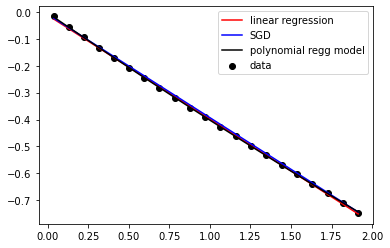

In [ ]:
# plot the original data and the optimized models (i.e., trendlines)

def plot_linear_model(x, m, b):   # x and y are track coordinates, m & b are coefficients
    y = m * x + b
    return(y)

plt.scatter(track['x'], track['y'], label="data", color='k')
plt.plot(track['x'], plot_linear_model(track['x'], lin_reg_params[0][0][0], lin_reg_params[1][0]), label="linear regression",color='red')
plt.plot(track['x'], plot_linear_model(track['x'], sgd_params[0], sgd_params[1]), label="SGD",color='blue')
plt.plot(track['x'], (poly_reg_params[0][0][1]*np.square(track['x']) + poly_reg_params[0][0][0]*track['x'] + poly_reg_params[1]), label="polynomial regg model",color='black')


plt.legend()
plt.show()

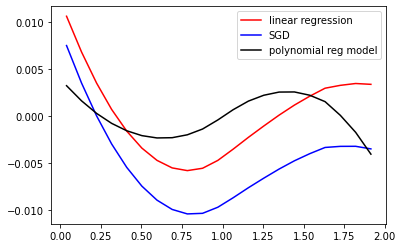

In [ ]:
# compare the models using a residual plot

plt.plot(track['x'], track['y'] - plot_linear_model(track['x'], lin_reg_params[0][0][0], lin_reg_params[1][0]), label="linear regression",color='red')
plt.plot(track['x'], track['y'] - plot_linear_model(track['x'], sgd_params[0], sgd_params[1]), label="SGD",color='blue')
plt.plot(track['x'], track['y'] - (poly_reg_params[0][0][1]*np.square(track['x']) + poly_reg_params[0][0][0]*track['x'] + poly_reg_params[1]), label="polynomial reg model",color='black')

plt.legend()
plt.show()

In [ ]:
# compare the models using chi-sq or residual sum of squares (RSS)

track['res_linreg'] = track['y'] - plot_linear_model(track['x'], lin_reg_params[0][0][0], lin_reg_params[1][0])
rss_linreg = (track['res_linreg']**2).sum()

track['res_sgd'] = track['y'] - plot_linear_model(track['x'], sgd_params[0], sgd_params[1])
rss_sgd = (track['res_sgd']**2).sum()

track['res_poly'] = track['y'] - (poly_reg_params[0][0][1]*np.square(track['x']) + poly_reg_params[0][0][0]*track['x'] + poly_reg_params[1])
rss_poly = (track['res_poly']**2).sum()

In [ ]:
# looks like the polynomial regression is the better fit
np.round([rss_linreg, rss_sgd, rss_poly],5)

array([3.9e-04, 9.4e-04, 8.0e-05])

### Regularized Models

So far we have trained models setting its parameters so that the model best fits the training set. If you perform a high-degree polynomial regression, you will fit the training data much better than the Linear Regression. Fitting a 300-degree polynomial data may **overfit** the data by curving through each individual point while **underfitting** can happen when the using a function with too few degrees (like using a line to fit curved data).

You can constrain the number of degrees a model uses for the fit by adjusting the hyperparameter *alpha*. ]A smaller value for alpha provides less constraint and the model will have a greater number of degrees (i.e., more curvy). A larger value of alpha makes a more-constrained model with of fewer degrees (i.e., more linear).

[Skikit Learn's ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) solves a regression model where the loss function is the linear least squares function. It is a regularized version of Linear Regression and adds a regularization term to the cost function. This forces the learning algorithm to keep the weights as small as possible during training. The hyperparameter (alpha) controls how much you want to regulatize the model.

Start by fitting the data to a ridge linear model and Sochastic Average Gradient descent (solver="sag") with an alpha of 0.01.

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg_sag = Ridge(alpha=0.01, solver="sag")
ridge_reg_sag.fit(X,Y)

Ridge(alpha=0.01, solver='sag')

In [ ]:
# How does increasing or decreasing alpha affect the fit?
ridge_reg_params = ridge_reg_sag.coef_, ridge_reg_sag.intercept_
ridge_reg_params

(array([[-0.38612979]]), array([-0.01174473]))

In [ ]:
# with alpha increased to 0.1
ridge_reg_sag = Ridge(alpha=0.1, solver="sag")
ridge_reg_sag.fit(X,Y)
ridge_reg_params = ridge_reg_sag.coef_, ridge_reg_sag.intercept_
ridge_reg_params

(array([[-0.38099564]]), array([-0.01674169]))

In [ ]:
# with alpha increased to 1
ridge_reg_sag = Ridge(alpha=1, solver="sag")
ridge_reg_sag.fit(X,Y)
ridge_reg_params = ridge_reg_sag.coef_, ridge_reg_sag.intercept_
ridge_reg_params

(array([[-0.33674837]]), array([-0.05980661]))

In [ ]:
# with alpha decreased to 0.001
ridge_reg_sag = Ridge(alpha=0.001, solver="sag")
ridge_reg_sag.fit(X,Y)
ridge_reg_params = ridge_reg_sag.coef_, ridge_reg_sag.intercept_
ridge_reg_params

(array([[-0.38720109]]), array([-0.01070206]))

In [ ]:
# Compare the Ridge Model prediction to your earlier lin_reg prediction

ridge_reg_sag.predict(X_new)

array([[-0.10750233],
       [-0.20430261],
       [-0.30110288],
       [-0.39790315]])

In [ ]:
# pretty similar to the linear model's predictions
linear_reg.predict(X_new)

array([[-0.10815949],
       [-0.20473262],
       [-0.30130575],
       [-0.39787887]])

[Least Absolute Shrinkage and Selection Operator (Lasso) Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) is another regularized version of Linear Regression. If you want the heavier math behind the difference between Ridge and Lasso, see this article on [L1 and L2 Regularization Methods](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c).

In [ ]:
# Compare the Lasso regression prediction to your earlier predictions.

lasso_reg = linear_model.Lasso(alpha=0.01)
lasso_reg.fit(X,Y)
lasso_reg.predict(X_new)        # pretty similar to the previous models' predictions

array([-0.13054053, -0.21937769, -0.30821485, -0.39705201])

In [ ]:
# What might indicate the alpha = 1 is too constrained of a model?

lasso_reg = linear_model.Lasso(alpha=1)
lasso_reg.fit(X,Y)
lasso_reg.predict(X_new)        # that's a flat line ... an underfit model

array([-0.38755662, -0.38755662, -0.38755662, -0.38755662])

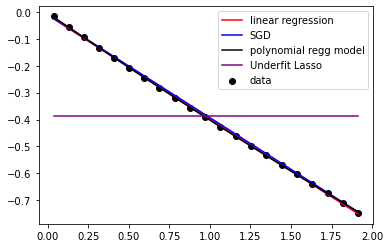

In [ ]:
lasso_reg_params = lasso_reg.coef_, lasso_reg.intercept_

plt.scatter(track['x'], track['y'], label="data", color='k')
plt.plot(track['x'], plot_linear_model(track['x'], lin_reg_params[0][0][0], lin_reg_params[1][0]), label="linear regression",color='red')
plt.plot(track['x'], plot_linear_model(track['x'], sgd_params[0], sgd_params[1]), label="SGD",color='blue')
plt.plot(track['x'], (poly_reg_params[0][0][1]*np.square(track['x']) + poly_reg_params[0][0][0]*track['x'] + poly_reg_params[1]), label="polynomial regg model",color='black')
plt.plot(track['x'], plot_linear_model(track['x'], lasso_reg_params[0], lasso_reg_params[1]), label="Underfit Lasso",color='purple')

plt.legend()
plt.show()

## Conclusion  


*How can you summarize the results of the different analysis methods?*

---  
## Saving Your Work  
This is running on a Google server on a distant planet and deletes what you've done when you close this tab. To save your work for later use or analysis you have a few options:  
- File > "Save a copy in Drive" will save it to you Google Drive in a folder called "Colaboratory". You can run it later from there.  
- File > "Download .ipynb" to save to your computer (and run with Jupyter software later)  
- File > Print to ... um ... print.  
- To save an image of a graph or chart, right-click on it and select Save Image as ...  

## Credits
This notebook was designed by Brown University PhD student Farrah Medi Simpson and [Quarknet](https://quarknet.org/) Teaching and Learning Fellow [Adam LaMee](https://adamlamee.github.io/). The handy csv files were created from the CMS Run2011A primary datasets and converted from ROOT format by the masterful [Tom McCauley](https://github.com/tpmccauley). More can be found on the [CERN OpenData](http://opendata.cern.ch/?ln=en) site. Finally, thanks to the great folks at [Binder](https://mybinder.org/) and [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) for making this notebook interactive without you needing to download it or install [Jupyter](https://jupyter.org/) on your own device.  

# Acknowledgements & Licenses

The development and implementation of these materials and workshop were additionally funded by generous support from IRIS-HEP, the [Institute for Research and Innovation in Software for High Energy Physics](https://iris-hep.org/).

This work is licensed under a
[Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License][cc-by-nc-sa].

[![CC BY-NC-SA 4.0][cc-by-nc-sa-image]][cc-by-nc-sa]

[cc-by-nc-sa]: http://creativecommons.org/licenses/by-nc-sa/4.0/
[cc-by-nc-sa-image]: https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png
[cc-by-nc-sa-shield]: https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg